In [2]:
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools as it

#set file path
copopulationdata = os.path.join('data', 'Colorado_Population.csv')
coarrestdata = os.path.join('data', 'ArrestRates.csv')
arrestandpopdata = os.path.join('data', 'crime_data_w_population_and_crime_rate.csv')

#pull data from file into lists for population and arrest data
allpop = pd.read_csv(copopulationdata)
allarrest = pd.read_csv(coarrestdata)
allpopandarrest = pd.read_csv(arrestandpopdata)
# allpop.describe()
# allarrest
allpop.sort_values(by=['Year','Age Group'], inplace=True)
allpop.head()


,Year,Population,Age Group,Year Group
38,1980,2097530,Adult,1980-1984
0,1980,379611,Juvenile,1980-1984
39,1981,2159216,Adult,1980-1984
1,1981,380535,Juvenile,1980-1984
40,1982,2230324,Adult,1980-1984


In [23]:
# create dataframes to summarize data
# sum population by year for each age group
sumpop = allpop.groupby('Year')['Population'].sum()
sumpop_df = pd.DataFrame(sumpop)

# create dataframe for Youth Age Group
ypopfilter = allpop['Age Group'].str.contains('Juvenile')
youthpop_df = allpop[ypopfilter]
youthpop_df.set_index('Year', inplace = True)

#create datafram for Adult Age Group
apopfilter = allpop['Age Group'].str.contains('Adult')
adultpop_df = allpop[apopfilter]
adultpop_df.set_index('Year', inplace = True)

allpopraw_df = allpop.groupby(['Year','Age Group']).agg({'Population':['sum']})
allpopraw_df.columns = ['Population']

allpopraw_df = allpopraw_df.reset_index()
allpop_df = allpopraw_df.pivot(index = 'Year', columns = 'Age Group', values = 'Population')
allpop_df.head()
# Preview DataFrame
# sumpop_df.head()


Age Group,Adult,Juvenile
Year,,
1980,2097530,379611
1981,2159216,380535
1982,2230324,379180
1983,2285869,378152
1984,2315719,374515


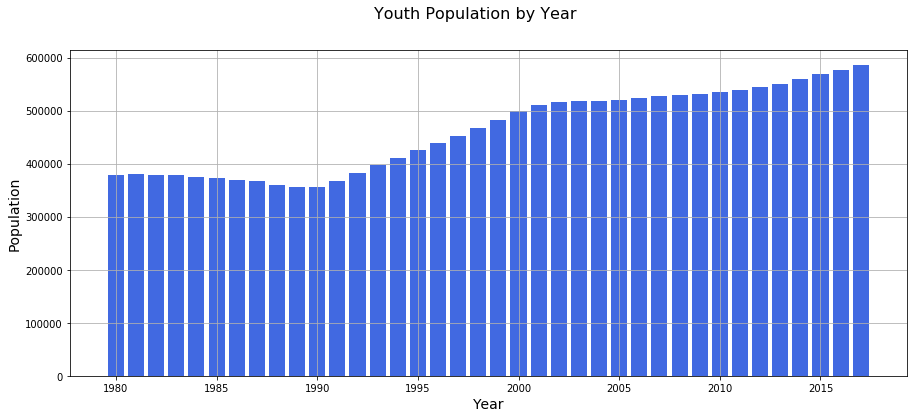

In [236]:

plt.figure(figsize=(15,6))

# loop through dataframe to build plot
for pop in youthpop_df.columns:
    plt.bar(youthpop_df.index, youthpop_df.Population, color = 'royalblue')

#Format the plot
plt.suptitle('Youth Population by Year',size = 16)
plt.xlabel('Year',size = 14)
plt.ylabel('Population',size = 14)
plt.grid()

plt.savefig('COYouthPop')
plt.show()

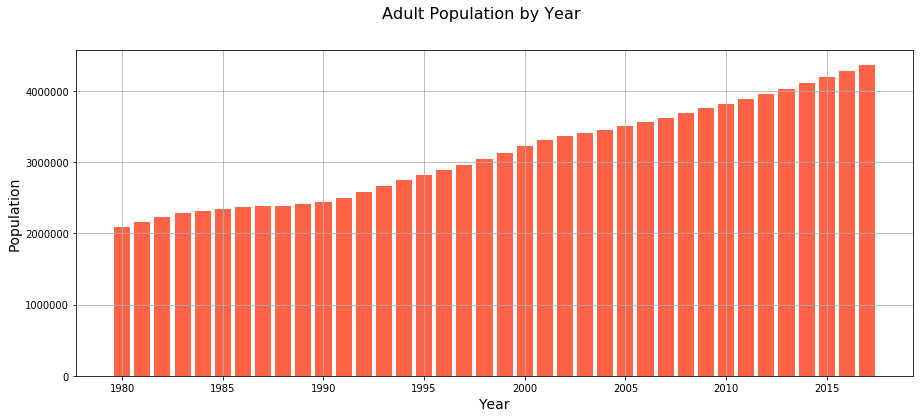

In [224]:
plt.figure(figsize=(15,6))

# loop through dataframe to build plot
for pop in adultpop_df.columns:
    plt.bar(adultpop_df.index, adultpop_df.Population, color = 'tomato')

#Format the plot
plt.suptitle('Adult Population by Year',size = 16)
plt.xlabel('Year',size = 14)
plt.ylabel('Population',size = 14)
plt.grid()

plt.savefig('COAdultPop')
plt.show()

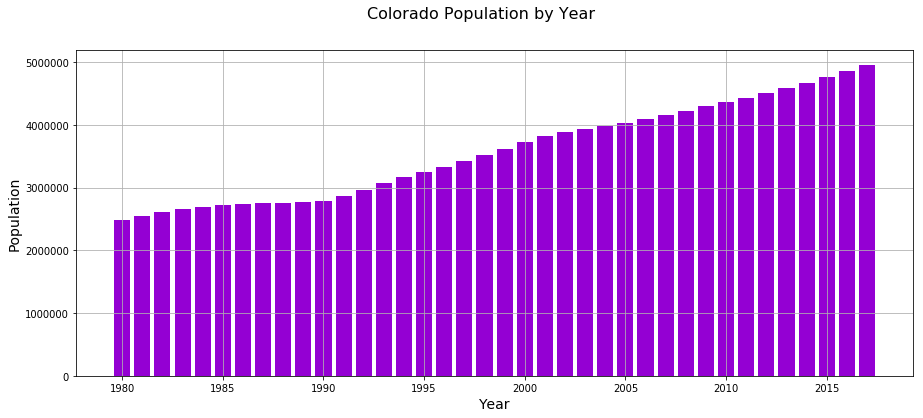

In [223]:
#change the size of the plot for better display
plt.figure(figsize=(15,6))

# Years Population Age Group Group Year

# loop through dataframe to build plot
for year in sumpop_df.columns:
    plt.bar(sumpop_df.index, sumpop_df.Population, color = 'darkviolet')

#Format the plot
plt.suptitle('Colorado Population by Year',size = 16)
plt.xlabel('Year',size = 14)
plt.ylabel('Population',size = 14)
plt.grid()

#plt.legend(loc = "lower left", labelspacing = 1, fontsize=12)

# Save the Figure
#plt.savefig('pymaceuticals_BCM_plot3')

plt.savefig('COSumPop')
plt.show()

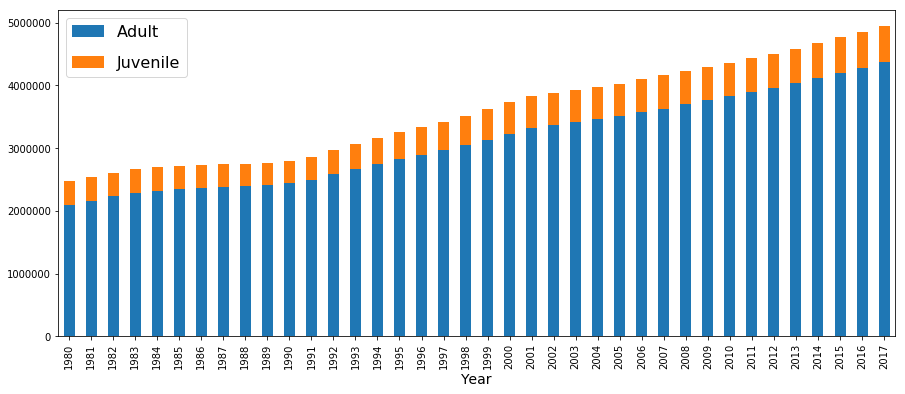

In [32]:
allpop_df.plot.bar(stacked = True, figsize = (15,6), legend = False)
plt.legend(loc = "upper left", labelspacing = 1, fontsize=16)
plt.xlabel('Year',size = 14)
plt.savefig('COSumPopStacked')
plt.show()